In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('./datasets_n_images/datasets_module_1/StudentsPerformance.csv')
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
print (df.shape)

(1000, 8)


In [17]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [18]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [19]:
passmark = 35

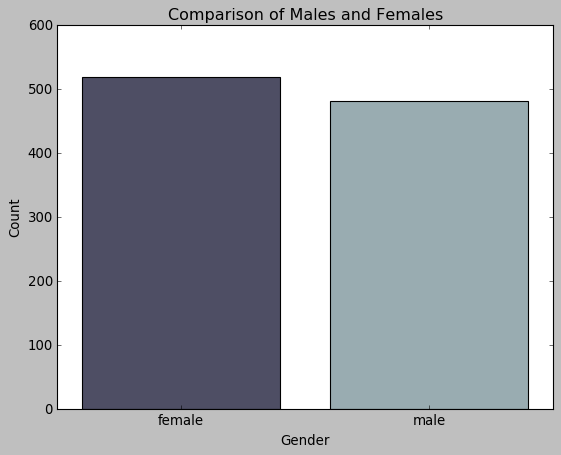

In [56]:
plt.rcParams['figure.figsize'] = (25, 5)
plt.style.use("classic")
sns.countplot(df['gender'], palette = 'bone')
plt.title('Comparison of Males and Females', fontweight = 25)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

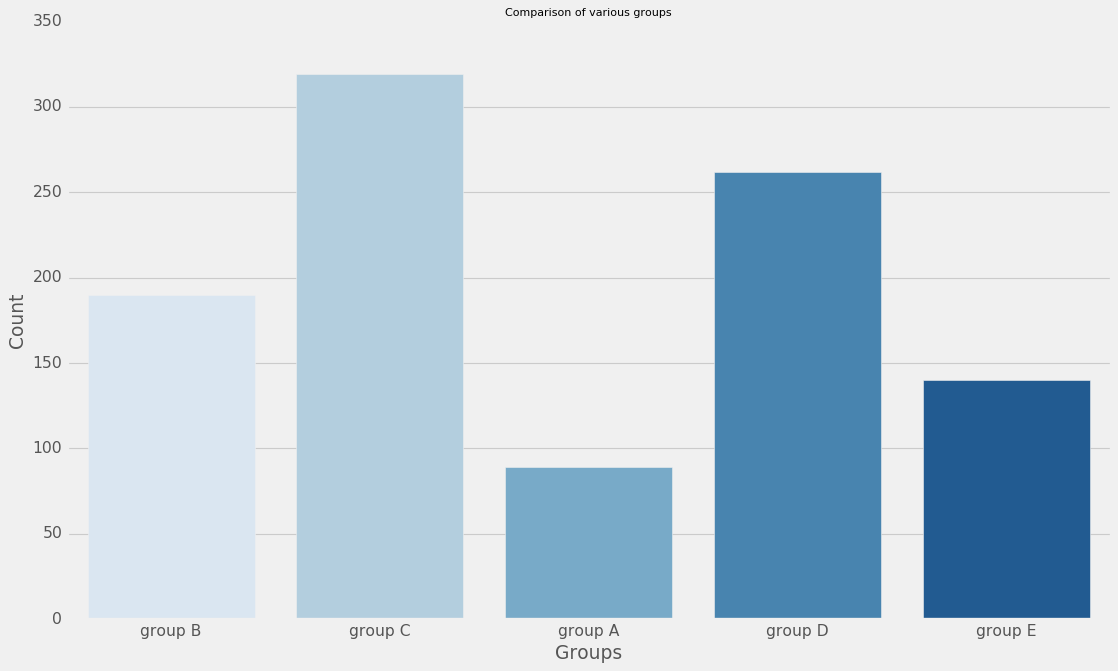

In [88]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(df['race/ethnicity'], palette = 'Blues')
plt.title('Comparison of various groups', fontweight = 10, fontsize = 10)
plt.xlabel('Groups')
plt.ylabel('Count')
plt.show

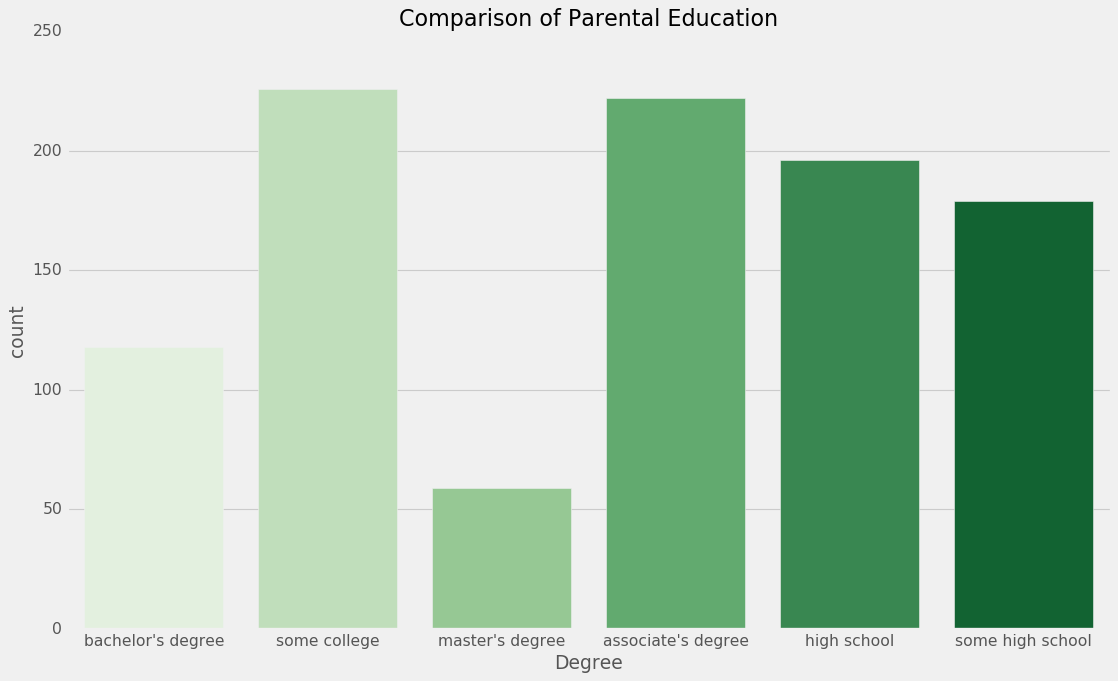

In [84]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Greens')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

In [76]:
#

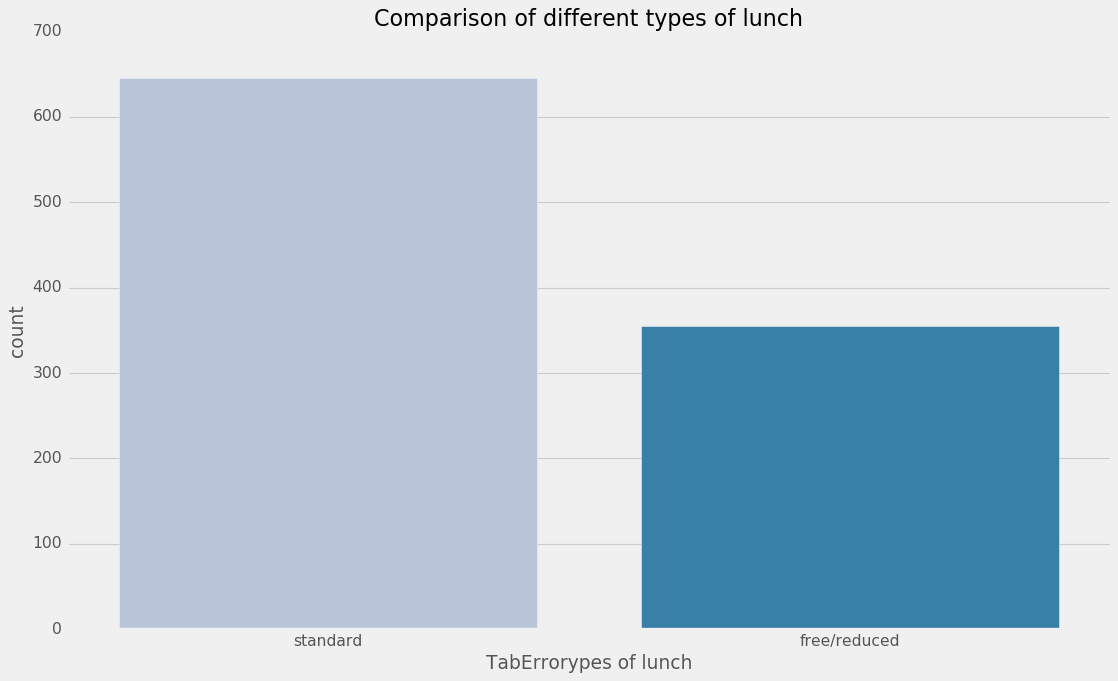

In [90]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('TabErrorypes of lunch')
plt.ylabel('count')
plt.show()

In [31]:
df['Math_PassStatus'] = np.where(df['math score']<passmark, 'F', 'P')
df.Math_PassStatus.value_counts()

P    978
F     22
Name: Math_PassStatus, dtype: int64

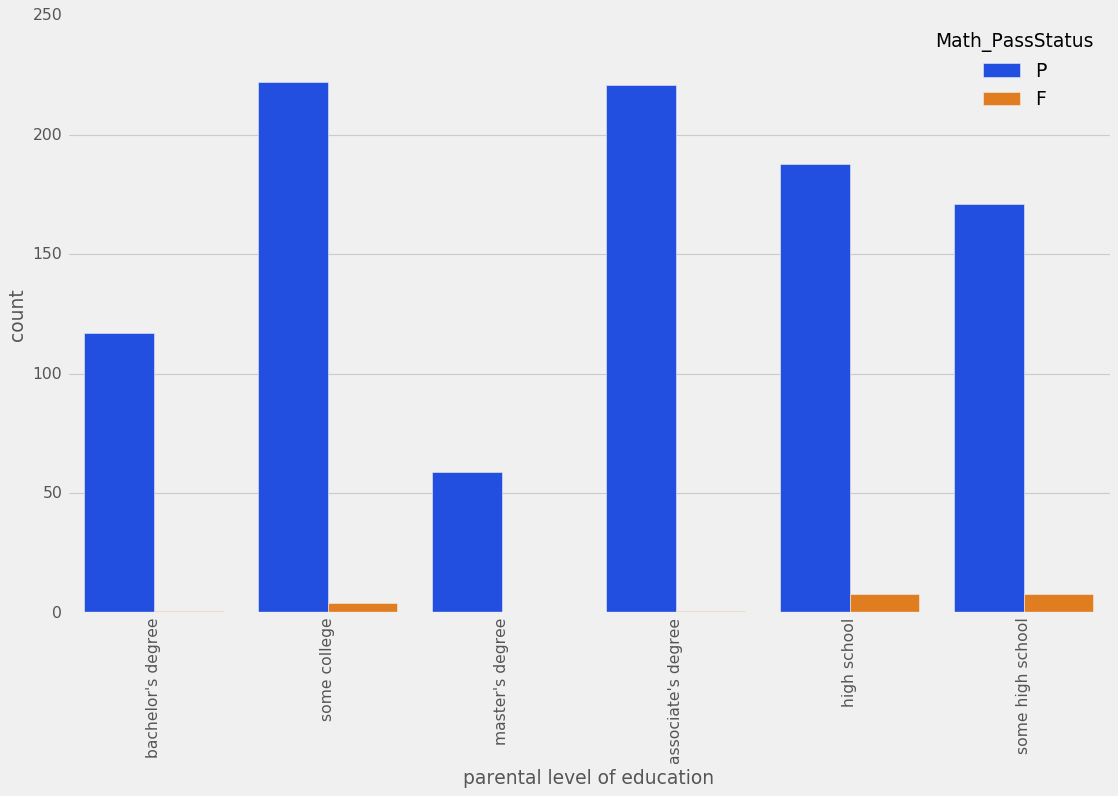

In [92]:
p = sns.countplot(x='parental level of education', data = df, hue='Math_PassStatus', palette='bright')
a= plt.setp(p.get_xticklabels(), rotation=90)

In [33]:
df['Reading_PassStatus'] = np.where(df['reading score']<passmark, 'F', 'P')
df.Reading_PassStatus.value_counts()

P    985
F     15
Name: Reading_PassStatus, dtype: int64

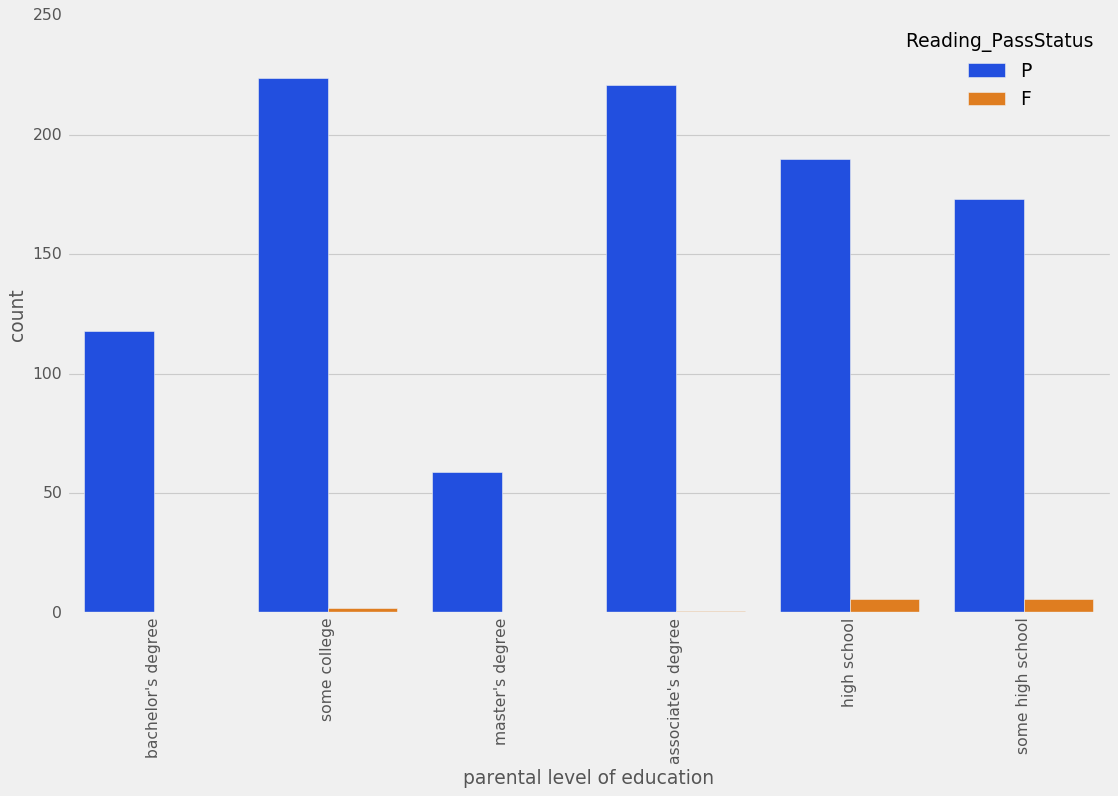

In [93]:
p = sns.countplot(x='parental level of education', data = df, hue='Reading_PassStatus', palette='bright')
a = plt.setp(p.get_xticklabels(), rotation=90)

In [36]:
df['Writing_PassStatus'] = np.where(df['writing score']<passmark, 'F', 'P')
df.Writing_PassStatus.value_counts()

P    983
F     17
Name: Writing_PassStatus, dtype: int64

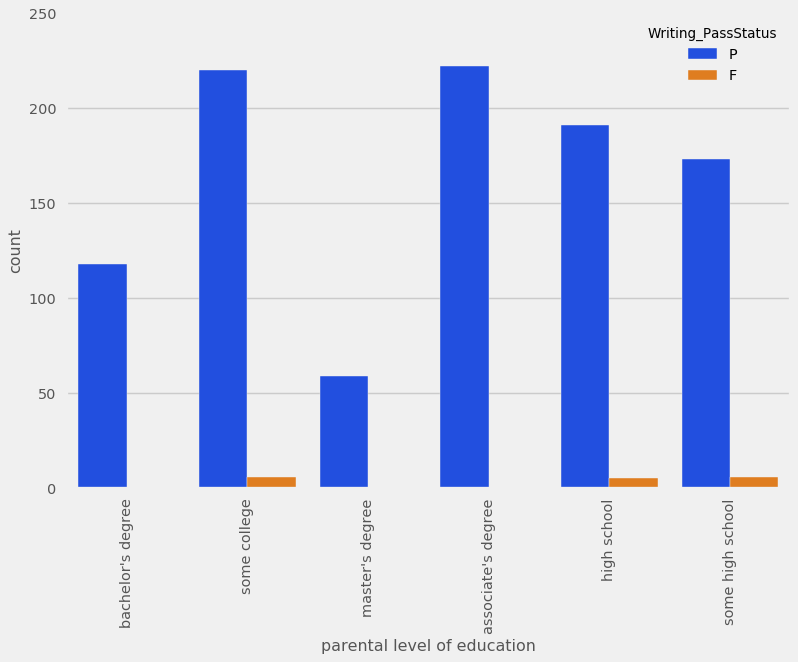

In [37]:

p = sns.countplot(x='parental level of education', data = df, hue='Writing_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [38]:
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)
df.OverAll_PassStatus.value_counts()

P    971
F     29
Name: OverAll_PassStatus, dtype: int64

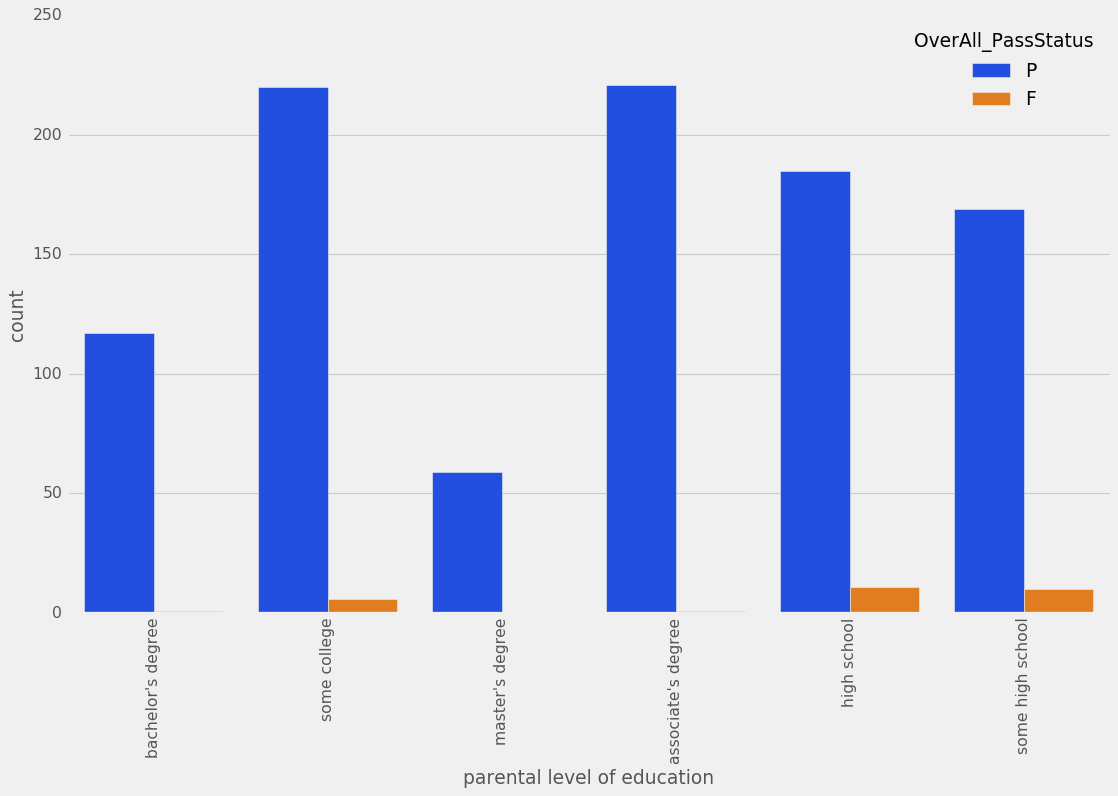

In [94]:
p = sns.countplot(x='parental level of education', data = df, hue='OverAll_PassStatus', palette='bright')
a= plt.setp(p.get_xticklabels(), rotation=90)

In [40]:
df['Total_Marks'] = df['math score']+df['reading score']+df['writing score']
df['Percentage'] = df['Total_Marks']/3

In [46]:

def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 35):
        return 'E'
    else: 
        return 'F'

df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

df.Grade.value_counts()

B    261
C    256
A    198
D    182
E     74
F     29
Name: Grade, dtype: int64

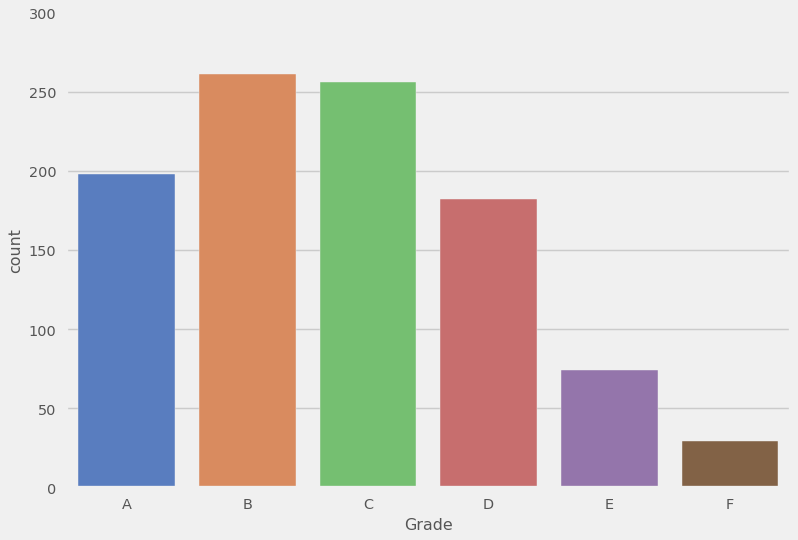

In [47]:
sns.countplot(x="Grade", data = df, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()

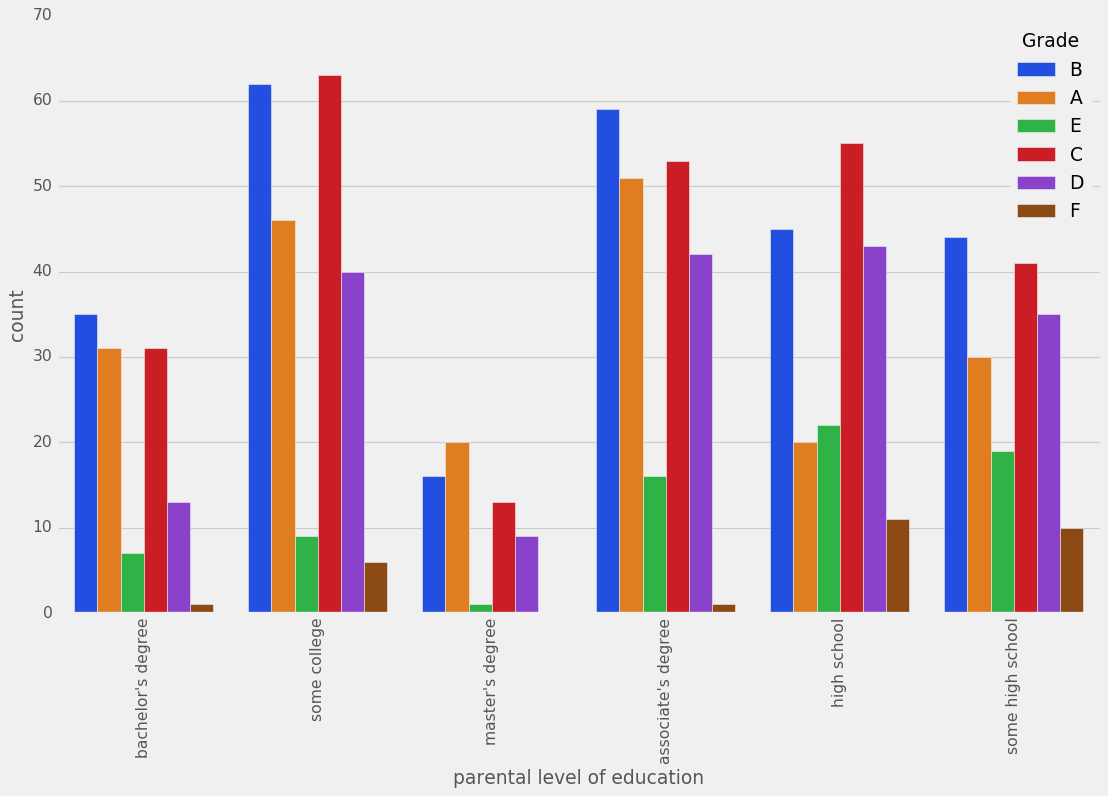

In [95]:
p = sns.countplot(x='parental level of education', data = df, hue='Grade', palette='bright')
a= plt.setp(p.get_xticklabels(), rotation=90)